In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/mental_health_data.csv')

# Display the first few rows of the DataFrame
data.head()


,Subreddit,Type,Post_id,Title,Author,Timestamp,Text,Score,Total_comments,Post_URL
0,mentalhealth,Post,8msp9v,Mental Health Awareness Month: I have schizoaf...,WarmlyEccentric,2018-05-28 19:31:47,NaN,3179.0,178.0,https://i.redd.it/rvjzbrtzen011.jpg
1,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,Candle1nTh3Dark,2018-05-28 19:41:32,"Thank you for posting this, I've failed univer...",141.0,0.0,NaN
2,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,sciencelove1994,2018-05-28 19:53:47,I have schizoaffective mixed episode type. I a...,61.0,0.0,NaN
3,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,Unknown,2018-05-28 20:04:29,As someone who is struggling with mental illne...,36.0,0.0,NaN
4,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,swild89,2018-05-28 20:00:07,I’m heading back now at 28! Thanks for the ins...,28.0,0.0,NaN


# Data Description

In [3]:
data.shape

(956842, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956842 entries, 0 to 956841
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Subreddit       956842 non-null  object 
 1   Type            956842 non-null  object 
 2   Post_id         956842 non-null  object 
 3   Title           956840 non-null  object 
 4   Author          956840 non-null  object 
 5   Timestamp       956840 non-null  object 
 6   Text            926344 non-null  object 
 7   Score           902613 non-null  float64
 8   Total_comments  902613 non-null  float64
 9   Post_URL        163216 non-null  object 
dtypes: float64(2), object(8)
memory usage: 73.0+ MB


In [5]:
data.isna().sum()

,0
Subreddit,0
Type,0
Post_id,0
Title,2
Author,2
Timestamp,2
Text,30498
Score,54229
Total_comments,54229
Post_URL,793626


# Data Cleaning

## Handle values that contains delete or removed in text and title

In [6]:
# Define a function to strip and convert to lowercase
def process_value(row):
    return row.strip().lower() if isinstance(row, str) else row

# Select only the categorical columns where the processing needs to happen
categorical_columns = ['Title', 'Text']

# Apply the function only to the selected categorical columns
df_processed = data.copy()
df_processed[categorical_columns] = df_processed[categorical_columns].applymap(process_value)

# Define the list of values to check (in lowercase)
check_values = ['removed', 'deleted']

# Create a boolean DataFrame where each value is True if it's in the check_values list
matches = df_processed[categorical_columns].isin(check_values)

# Get the rows that contain any of the specified values in the categorical columns
rows_with_values = data[matches.any(axis=1)]

# Output results
if not rows_with_values.empty:
    print("The DataFrame contains at least one of the values: 'removed', 'deleted'.")
    print("Rows containing these values:")
    print(rows_with_values)
else:
    print("No rows contain the values: 'removed', 'deleted'.")


The DataFrame contains at least one of the values: 'removed', 'deleted'.
Rows containing these values:
              Subreddit     Type Post_id  \
118181          therapy  Comment  gsfsdn   
590784    socialanxiety  Comment  6b7jkd   
740414  selfimprovement  Comment  las3p2   
947545             ptsd     Post  i1qpto   
955339             ptsd     Post  d77n99   

                                                    Title       Author  \
118181  Has anyone had a session in which issues were ...      Unknown   
590784                                   "social anxiety"      Unknown   
740414                                               STOP      Unknown   
947545                      Is this...like...double-PTSD?  pajamabagel   
955339                          PTSD and career evolution  Forkastning   

                  Timestamp     Text  Score  Total_comments  \
118181  2020-05-28 22:23:12  Deleted   -1.0             0.0   
590784  2017-05-15 12:02:06  deleted    1.0             0.0  

In [7]:
# Identify rows to keep (those that do NOT have any matching values)
rows_to_keep = ~matches.any(axis=1)

# Filter the DataFrame to only keep those rows
data = data[rows_to_keep]

# Reset the index of the cleaned DataFrame if needed
data.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned DataFrame
data.shape

(956837, 10)

## Data Handling

In [8]:
# Fill missing values for columns
data1 = data.copy()  # To prevent SettingWithCopyWarning
data['Title'] = data['Title'].fillna('Unknown')
data['Author'] = data['Author'].fillna('Unknown')
data['Timestamp'] = data['Timestamp'].ffill()  # Use ffill() directly instead of inplace
data['Score'] = data['Score'].fillna(0)
data['Total_comments'] = data['Total_comments'].fillna(0)

# Drop the 'Post_URL' column
data = data.drop(columns=['Post_URL'])

# Drop rows where the 'Text' column has NaN values
data = data.dropna(subset=['Text'])

# Reset the index of the cleaned DataFrame
data.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned DataFrame
print(data.head())

      Subreddit     Type Post_id  \
0  mentalhealth  Comment  8msp9v   
1  mentalhealth  Comment  8msp9v   
2  mentalhealth  Comment  8msp9v   
3  mentalhealth  Comment  8msp9v   
4  mentalhealth  Comment  8msp9v   

                                               Title           Author  \
0  Mental Health Awareness Month: I have schizoaf...  Candle1nTh3Dark   
1  Mental Health Awareness Month: I have schizoaf...  sciencelove1994   
2  Mental Health Awareness Month: I have schizoaf...          Unknown   
3  Mental Health Awareness Month: I have schizoaf...          swild89   
4  Mental Health Awareness Month: I have schizoaf...          Unknown   

             Timestamp                                               Text  \
0  2018-05-28 19:41:32  Thank you for posting this, I've failed univer...   
1  2018-05-28 19:53:47  I have schizoaffective mixed episode type. I a...   
2  2018-05-28 20:04:29  As someone who is struggling with mental illne...   
3  2018-05-28 20:00:07  I’m heading 

In [9]:
data.shape

(926339, 9)

In [10]:
data.isna().sum()

,0
Subreddit,0
Type,0
Post_id,0
Title,0
Author,0
Timestamp,0
Text,0
Score,0
Total_comments,0


>  No missing values in any columns after handling

# Data Analysis

In [12]:
data[['Score', 'Total_comments']].describe()


,Score,Total_comments
count,926339.000000,926339.000000
mean,14.956590,1.769699
std,134.655784,32.454572
min,-403.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,5.000000,0.000000
max,24998.000000,18655.000000


In [ ]:
# # Define a function to remove outliers based on the IQR
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)  # First quartile (25%)
#     Q3 = df[column].quantile(0.75)  # Third quartile (75%)
#     IQR = Q3 - Q1  # Interquartile range

#     # Define lower and upper bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Remove rows with outliers in the specified column
#     df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_filtered



In [ ]:
# # Apply the function to remove outliers from 'Total_comments' and 'Score'
# data_cleaned = remove_outliers(data, 'Total_comments')
# data_cleaned = remove_outliers(data_cleaned, 'Score')



In [ ]:
# # Check the shape of the cleaned data
# print("Original data shape:", data.shape)
# print("Cleaned data shape:", data_cleaned.shape)

In [13]:
#Check the types of posts (Type - post or comment) and their distributions.

print(data['Type'].value_counts())


Type
Comment    768736
Post       157603
Name: count, dtype: int64


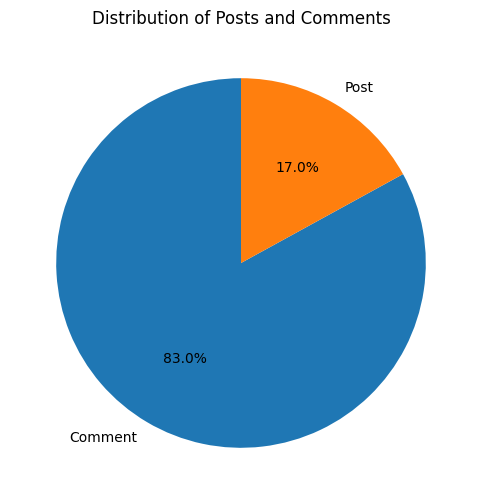

In [14]:
post_type_counts = data['Type'].value_counts()

plt.figure(figsize=(6, 6))
post_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Posts and Comments')
plt.ylabel('')
plt.show()

In [15]:
#Getting the unique value counts.
data[['Subreddit','Author']].nunique()


,0
Subreddit,45
Author,337902


In [16]:
data[['Subreddit', 'Author']].value_counts()

Subreddit     Author             
depression    Unknown                30077
autism        nombredesusuario123    27546
anxiety       Unknown                18835
OCD           [deleted]              17181
mentalhealth  Unknown                12803
                                     ...  
depression    Devlinukr                  1
              DeviousThread              1
              DevinC1200                 1
              Deviltattoo                1
yoga          zzurc                      1
Name: count, Length: 372856, dtype: int64

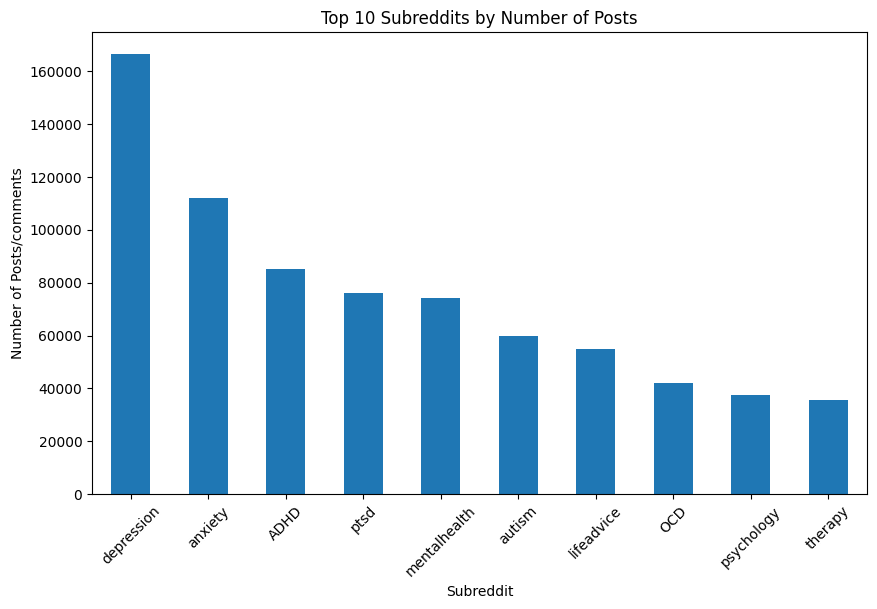

In [17]:

# Count the number of posts/comments per subreddit
subreddit_counts = data['Subreddit'].value_counts()

# Plot the top 10 subreddits by number of posts
plt.figure(figsize=(10, 6))
subreddit_counts.head(10).plot(kind='bar')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts/comments')
plt.title('Top 10 Subreddits by Number of Posts')
plt.xticks(rotation=45)
plt.show()


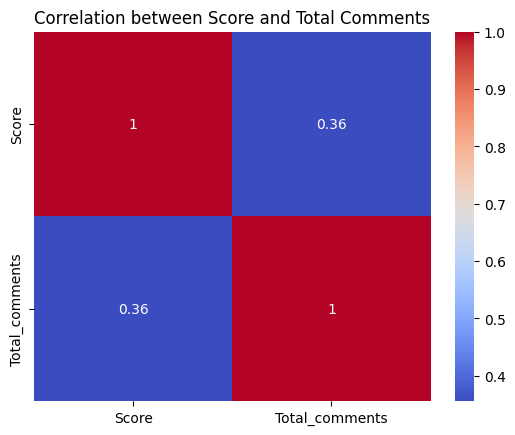

In [18]:
correlation = data[['Score', 'Total_comments']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Score and Total Comments')
plt.show()


In [19]:
top_posts = data.nlargest(10, 'Score')[['Subreddit', 'Title', 'Score']]
print(top_posts)


                 Subreddit                                              Title  \
535735  decidingtobebetter  A decade ago I was kicked out of college with ...   
536175  decidingtobebetter  I have now officially made it 30 days without ...   
746711          psychology  Scientists Find No Evidence That Depression Is...   
451969                ADHD                    How I cured my adhd permanently   
536787  decidingtobebetter                   10 days clean from crystal meth.   
452799                ADHD  I went through 700 reddit comments and collect...   
453379                ADHD  ADHD for me is laying down on my couch using m...   
453707                ADHD  It feels like there aren’t enough hours in the...   
454075                ADHD  It's so damn irritating to be intelligent with...   
537278  decidingtobebetter  I know this will die in new but I just wanted ...   

          Score  
535735  24998.0  
536175  15970.0  
746711  12959.0  
451969  12808.0  
536787  11346.0  


In [20]:
top_comments = data.nlargest(10, 'Total_comments')[['Subreddit', 'Title', 'Total_comments']]
print(top_comments)


         Subreddit                                              Title  \
297617     anxiety      Let's post good news on the coronavirus here.   
383759     anxiety                                 Ukraine Megathread   
196190  depression                              Regular Check-In Post   
241558  depression                              Regular Check-In Post   
205558  depression                              Regular Check-In Post   
264546  depression                              Regular Check-In Post   
507194         sad   What is the most painless way to commit suicide?   
236551  depression  Regular Check-In Post. Plus, a reminder about ...   
808572        ADHD  What song is currently playing the background ...   
787844        ADHD  Tell me you have ADHD without telling me you h...   

        Total_comments  
297617         18655.0  
383759         10015.0  
196190          8420.0  
241558          7280.0  
205558          7032.0  
264546          5196.0  
507194          4074.

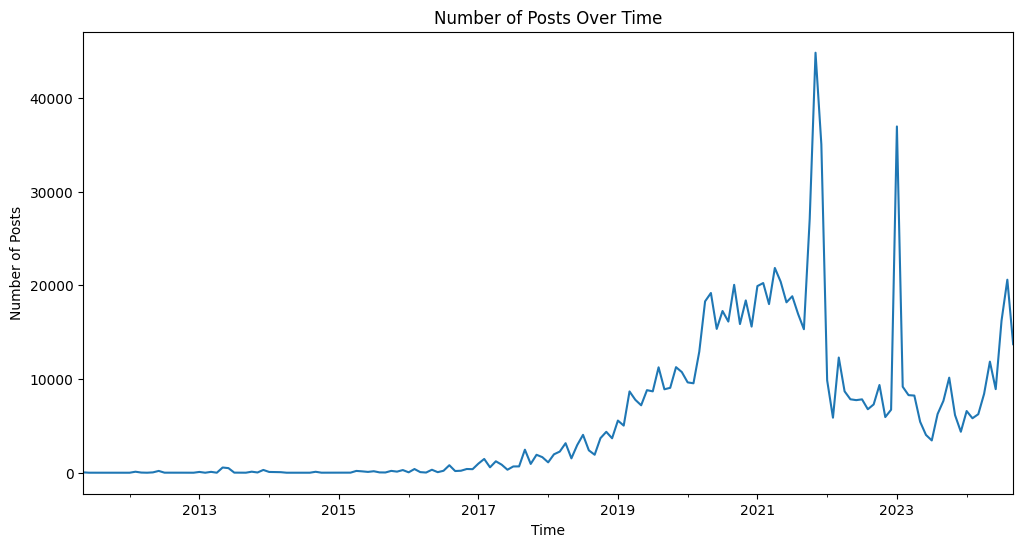

In [21]:

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

# Plot the number of posts over time
data.resample('M').size().plot(figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Number of Posts')
plt.title('Number of Posts Over Time')
plt.show()
data.reset_index(inplace=True)


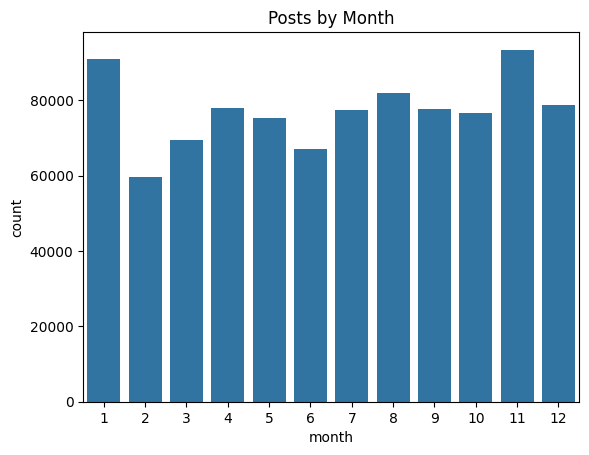

In [22]:

data['month'] = data['Timestamp'].dt.month
sns.countplot(x='month', data=data)
plt.title('Posts by Month')
plt.show()



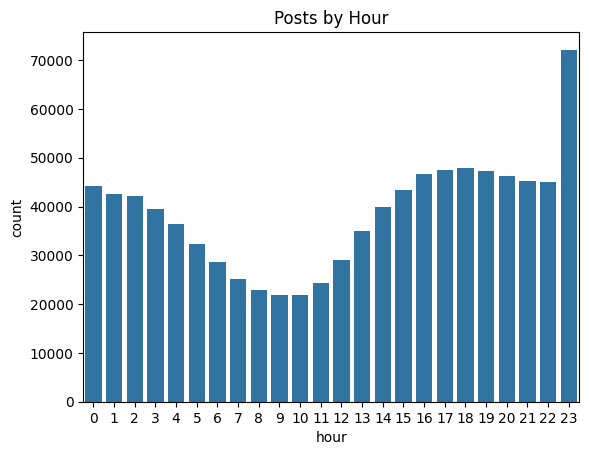

In [23]:

data['hour'] = data['Timestamp'].dt.hour
sns.countplot(x='hour', data=data)
plt.title('Posts by Hour')
plt.show()



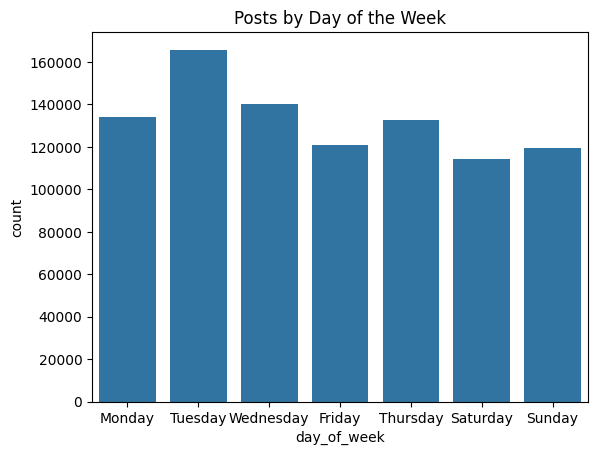

In [24]:
data['day_of_week'] = data['Timestamp'].dt.day_name()
sns.countplot(x='day_of_week', data=data)
plt.title('Posts by Day of the Week')
plt.show()


<Figure size 1400x800 with 0 Axes>

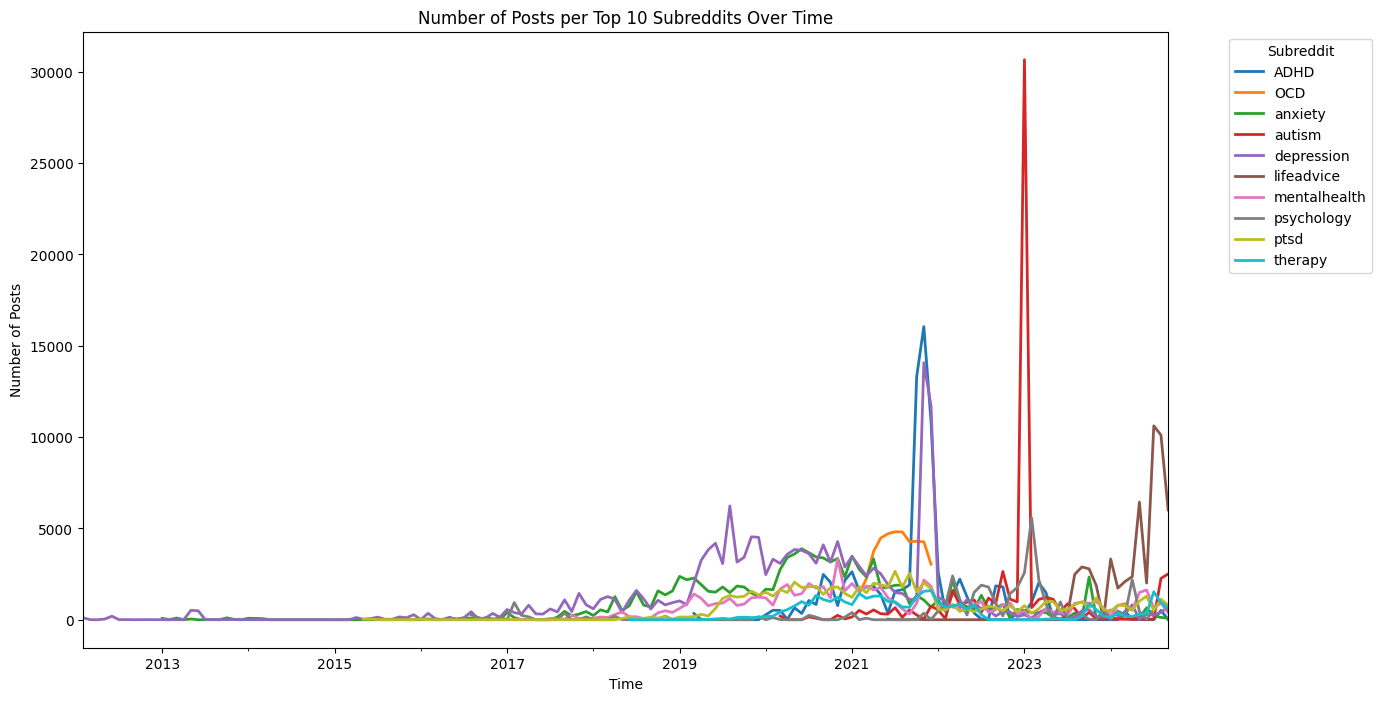

In [25]:
# Ensure 'Timestamp' is in datetime format and 'Subreddit' is categorical
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Subreddit'] = data['Subreddit'].astype('category')

# Set 'Timestamp' as the index for resampling
data.set_index('Timestamp', inplace=True)

# Get the top 20 subreddits by post count
top_subreddits = data['Subreddit'].value_counts().nlargest(10).index

# Filter data to include only the top 20 subreddits
data_top_subreddits = data[data['Subreddit'].isin(top_subreddits)]

# Resample data by month for each top subreddit and count posts
posts_per_subreddit = data_top_subreddits.groupby('Subreddit').resample('M').size().unstack(level=0)

# Plot the data for the top 20 subreddits
plt.figure(figsize=(14, 8))
posts_per_subreddit.plot(figsize=(14, 8), linewidth=2)
plt.title('Number of Posts per Top 10 Subreddits Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Posts')
plt.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


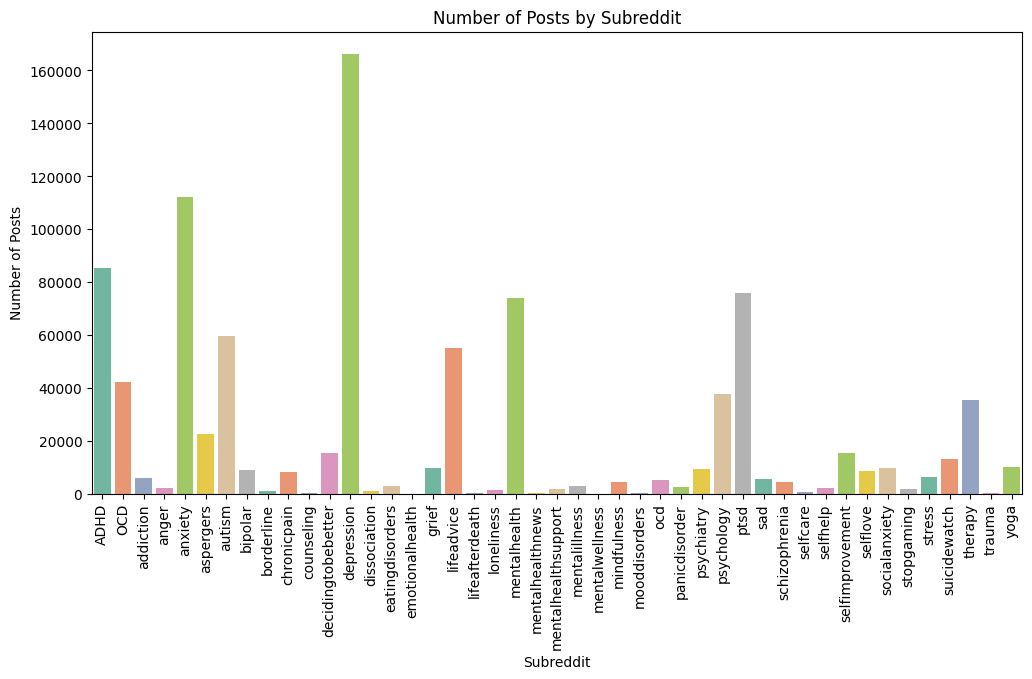

In [26]:
# Reset the index to include 'Timestamp' as a column again
data.reset_index(inplace=True)

# Count the number of posts per subreddit
posts_per_subreddit = data['Subreddit'].value_counts()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=posts_per_subreddit.index, y=posts_per_subreddit.values, palette='Set2')
plt.xticks(rotation=90)
plt.title('Number of Posts by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.show()


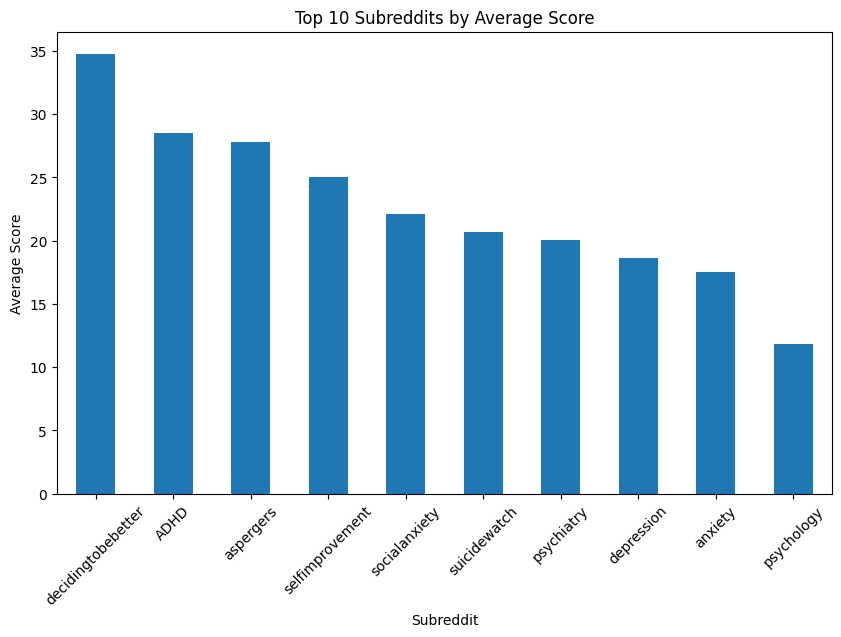

In [27]:
avg_score_per_subreddit = data.groupby('Subreddit')['Score'].mean().sort_values(ascending=False)

# Plot the top 10 subreddits by average score
plt.figure(figsize=(10, 6))
avg_score_per_subreddit.head(10).plot(kind='bar')
plt.xlabel('Subreddit')
plt.ylabel('Average Score')
plt.title('Top 10 Subreddits by Average Score')
plt.xticks(rotation=45)
plt.show()


## Text Analysis

In [28]:
data['Title_word_count'] = data['Title'].apply(lambda x: len(str(x).split()))
data['Text_word_count'] = data['Text'].apply(lambda x: len(str(x).split()))

data[['Title_word_count', 'Text_word_count']].describe()

,Title_word_count,Text_word_count
count,926339.000000,926339.000000
mean,13.097503,54.721485
std,9.655089,101.567987
min,1.000000,0.000000
25%,6.000000,6.000000
50%,11.000000,24.000000
75%,17.000000,63.000000
max,68.000000,7198.000000


In [29]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Get word counts for Title and Text, without converting to dict
title_words = Counter(" ".join(data['Title'].fillna("")).split())
text_words = Counter(" ".join(data['Text'].fillna("")).split())

# Remove stop words, keeping the data as Counter objects
title_words = Counter({word: count for word, count in title_words.items() if word.lower() not in ENGLISH_STOP_WORDS})
text_words = Counter({word: count for word, count in text_words.items() if word.lower() not in ENGLISH_STOP_WORDS})

# Print the 10 most common words
print("Most common words in Title:", title_words.most_common(10))
print("Most common words in Text:", text_words.most_common(10))


Most common words in Title: [('like', 94116), ('just', 69790), ('thing', 67623), ('feel', 61124), ('really', 49857), ('people', 48827), ('Does', 40801), ('anxiety', 38561), ("I'm", 36131), ('want', 35623)]
Most common words in Text: [('just', 299915), ('like', 281266), ('feel', 192301), ("I'm", 192222), ('people', 154935), ('know', 148515), ('I’m', 140788), ('really', 126738), ("don't", 121164), ('think', 115869)]


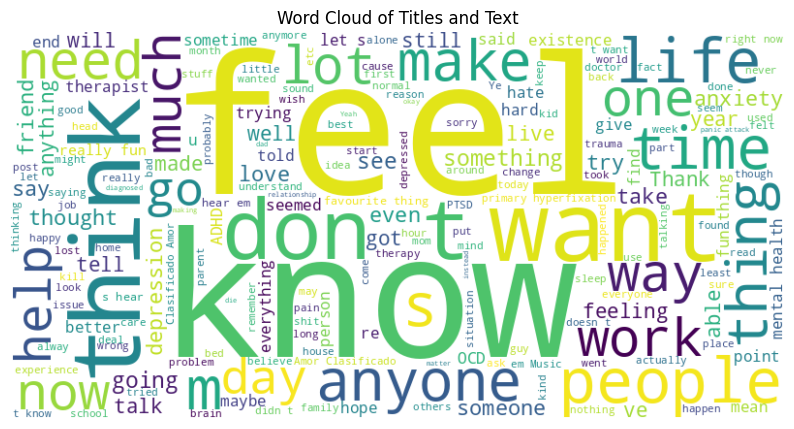

In [ ]:
from wordcloud import WordCloud

# Combine all text in 'Title' and 'Text' columns
all_text = ' '.join(data['Title'].astype(str)) + ' ' + ' '.join(data['Text'].astype(str))

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles and Text')
plt.show()


In [33]:
data.head(5)

,Timestamp,Subreddit,Type,Post_id,Title,Author,Text,Score,Total_comments,month,hour,day_of_week,Title_word_count,Text_word_count
0,2018-05-28 19:41:32,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,Candle1nTh3Dark,"Thank you for posting this, I've failed univer...",141.0,0.0,5,19,Monday,48,20
1,2018-05-28 19:53:47,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,sciencelove1994,I have schizoaffective mixed episode type. I a...,61.0,0.0,5,19,Monday,48,33
2,2018-05-28 20:04:29,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,Unknown,As someone who is struggling with mental illne...,36.0,0.0,5,20,Monday,48,49
3,2018-05-28 20:00:07,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,swild89,I’m heading back now at 28! Thanks for the ins...,28.0,0.0,5,20,Monday,48,11
4,2018-05-28 20:49:44,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,Unknown,[deleted],16.0,0.0,5,20,Monday,48,1
